<img src="../../images/dltr_logo.png" />
<h2>FASHION MNIST</h2>
<p>10 sınıflı kıyafet verisetinde eğitilmiş model ile sınıflandırma testi örneği</p>

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

In [ ]:
!pip3 install -q keras

In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Veri setlerini yükleme
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# fashion mnist etiket isimleri
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

<b>Eğitilmiş modeli save_models klasörü oluşturarak klasör içerisine indirelim</b>

In [ ]:
!mkdir save_models
!wget -P save_models https://github.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/raw/master/KERAS/notebooks/save_models/model_fashion-mnist_cnn_train1_epoch12.h5 -P save_models

<b>Eğitilmiş modeli yükleyerek, test verisetinden rastgele 100 örneği sınıflandırıyoruz</b>

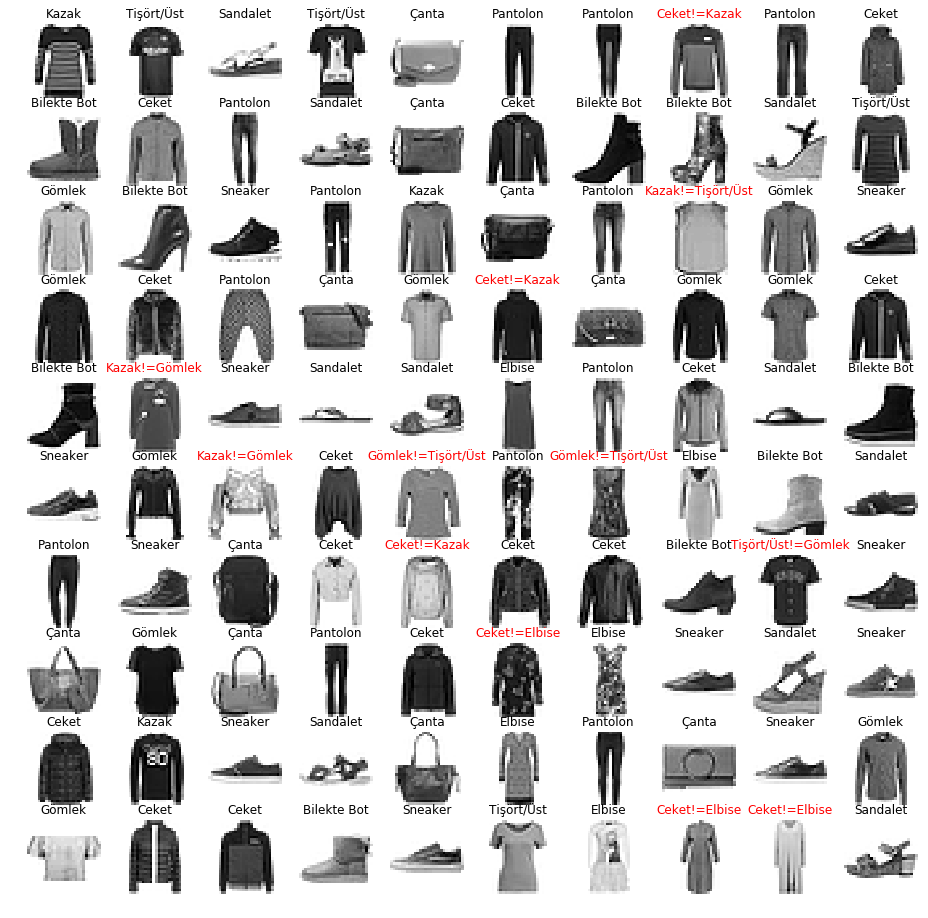

Doğru tahminlerin sayısı: 88
Hata sayısı: 12
Doğru tahmin oranı: 88.0 %


In [9]:
model = load_model('save_models/model_fashion-mnist_cnn_train1_epoch12.h5')

    
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')